# Spotify Most Streamed Songs 2023

## In this project we want to analize
1. Top 10 most streams on Spotify
2. Music Trends Analysis
3. Predicting song popularity using machine learning

### All libraries we want:



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Prepare data

In [2]:
data = pd.read_csv("data/spotify-2023.csv", encoding='ISO-8859-1')

In [3]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Number of songs
len(data)

953

In [5]:
data.info()
data.isna().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [6]:
# Delete null data
data["in_shazam_charts"].fillna(0, inplace=True) # Put 0 in all of miss value
data["key"].fillna("C", inplace=True) # Inplace most of miss value with 'C'
data.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [7]:
# Drop duplicate
data = data.drop_duplicates()

In [8]:
# Check duplicates
duplicates = data[data.duplicated(keep=False)]
if not duplicates.empty:
    print("Find duplicates:")
    print(duplicates)
else:
    print("None duplicates.")

None duplicates.


In [9]:
# Change types of "streams","in_deezer_playlists","in_shazam_charts"
data["streams"] = data["streams"].astype("Int64")

ValueError: invalid literal for int() with base 10: 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [10]:
# Filter rows where 'streams' column cannot be converted to a number
non_numeric_rows = data[~data['streams'].str.isnumeric()]['streams']
print(non_numeric_rows)

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [11]:
# Drop 574 index
data = data.drop(574)
data["streams"] = data["streams"].astype('Int64')

In [12]:
data["in_deezer_playlists"] = data["in_deezer_playlists"].astype('Int64')

ValueError: invalid literal for int() with base 10: '2,445'

In [13]:
# Remove commas
data['in_deezer_playlists'] = data['in_deezer_playlists'].str.replace(',', '').astype('Int64')
data['in_shazam_charts'] = data['in_shazam_charts'].str.replace(',', '').astype('Int64')

## 1.Top 10 streams on Spotify



### 1.1 Top 10 streamed songs

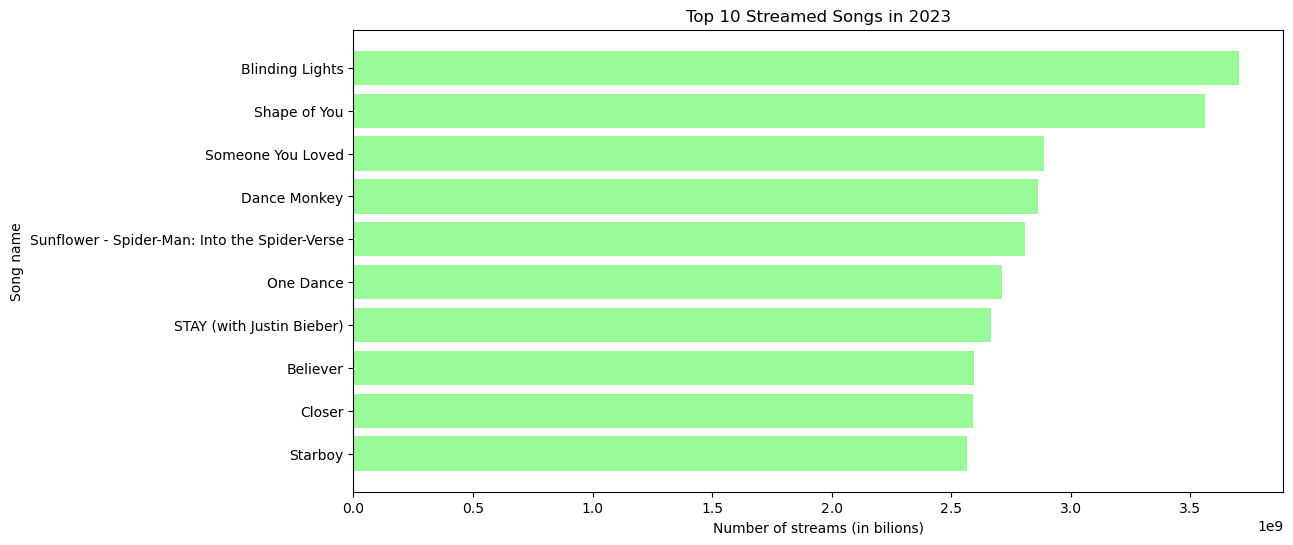

In [14]:
# Sort for visualization
data_top = data[['track_name','artist(s)_name','streams']].sort_values(by="streams", ascending=False).head(10)

top_10 = data_top.head(10)
songs = top_10["track_name"].tolist()
streams = top_10["streams"].tolist()
# Plot songs with streams
plt.figure(figsize=(12,6))
plt.barh(songs, streams, color="palegreen")
plt.xlabel("Number of streams (in bilions)")
plt.ylabel("Song name")
plt.title("Top 10 Streamed Songs in 2023")
plt.gca().invert_yaxis()
plt.show()

### 1.2 Most streamed Artist's

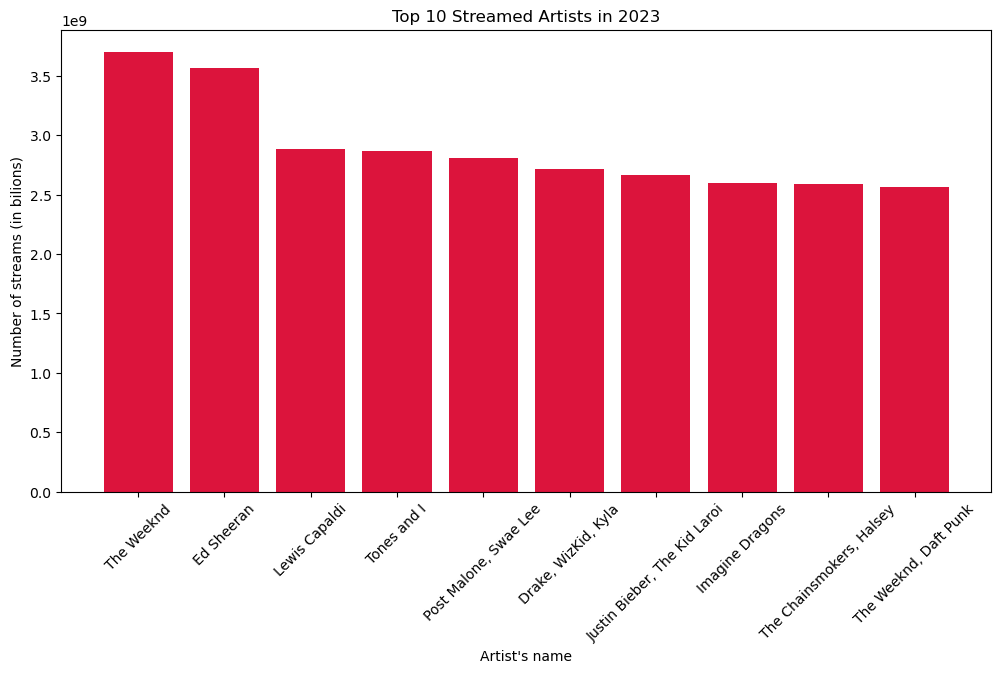

In [15]:
data_top_artists = data[['artist(s)_name','streams']].sort_values(by="streams", ascending=False).head(10)
top_10 = data_top_artists.head(10)
artists = top_10["artist(s)_name"].tolist()
streams = top_10["streams"].tolist()
# Plot songs with streams
plt.figure(figsize=(12,6))
plt.bar(artists, streams, color="crimson")
plt.xlabel("Artist's name")
plt.ylabel("Number of streams (in bilions)")
plt.title("Top 10 Streamed Artists in 2023")
plt.xticks(rotation=45)
plt.show()

## 2.Music Trends Analysis




### 2.1 Correlations between tempo(in bpm) and each characteristic



In [16]:
correlations = {}
correlations["danceability_%"] = data["bpm"].corr(data["danceability_%"])
correlations["valence_%"] = data["bpm"].corr(data["valence_%"])
correlations["energy_%"] = data["bpm"].corr(data["energy_%"])
correlations["acousticness_%"] = data["bpm"].corr(data["acousticness_%"])
correlations["instrumentalness_%"] = data["bpm"].corr(data["instrumentalness_%"])
correlations["liveness_%"] = data["bpm"].corr(data["liveness_%"])
correlations["speechiness_%"] = data["bpm"].corr(data["speechiness_%"])

In [17]:
correlations

{'danceability_%': -0.1476295243700346,
 'valence_%': 0.04169277829335058,
 'energy_%': 0.025932347614237627,
 'acousticness_%': -0.018064643196065645,
 'instrumentalness_%': -0.0012832753462334555,
 'liveness_%': -0.0008026429891763877,
 'speechiness_%': 0.03893679272721193}

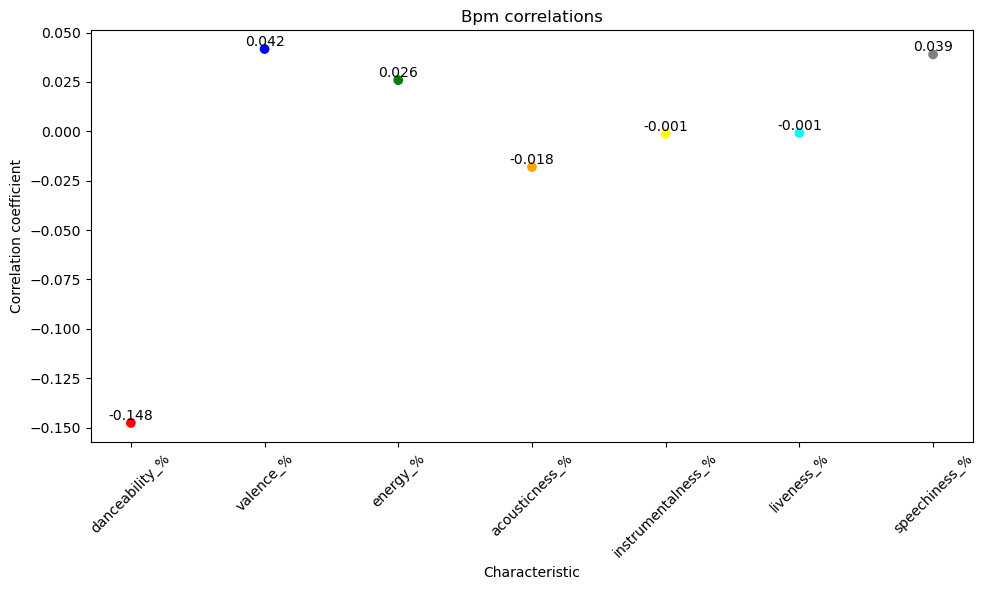

In [18]:
# Plot correlations
x = list(correlations.keys())
y = list(correlations.values())

plt.figure(figsize=(10,6))
plt.scatter(x, y, color=("r","b","g","orange","yellow","cyan","grey"), marker="o")
plt.title("Bpm correlations")
plt.xlabel("Characteristic")
plt.ylabel("Correlation coefficient")
plt.xticks(rotation=45)

for i, txt in enumerate(x):
    plt.text(x[i], y[i], round(y[i], 3), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

### The correlation is weak in each case

### 2.2 Distribution of keys and mode

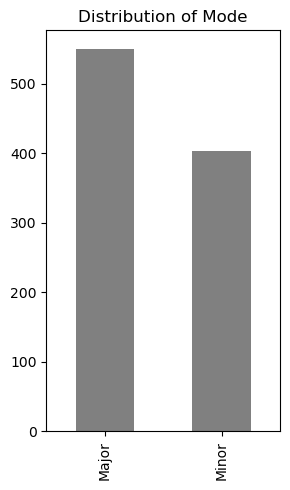

In [19]:
# Plot mode
mode_count = data["mode"].value_counts()
mode_count = mode_count.sort_index()

plt.figure(figsize=(3,5))
mode_count.plot(kind="bar", color="grey")
plt.title("Distribution of Mode")
plt.xlabel("")
plt.tight_layout()
plt.show()

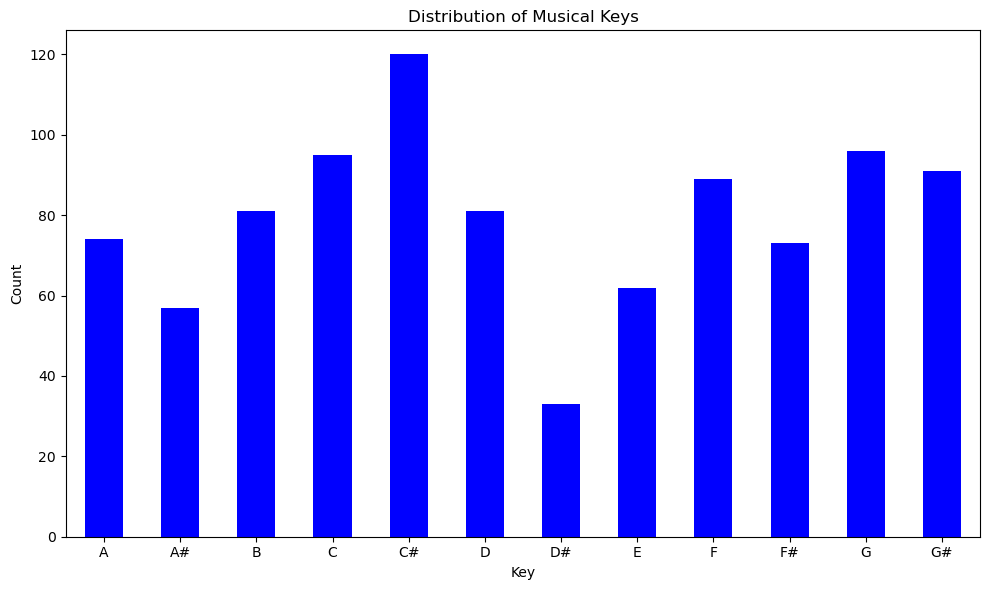

In [20]:
# Plot keys
key_count = data["key"].value_counts()
key_count = key_count.sort_index()

plt.figure(figsize=(10,6))
key_count.plot(kind="bar", color="b")
plt.title('Distribution of Musical Keys')
plt.xlabel('Key')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

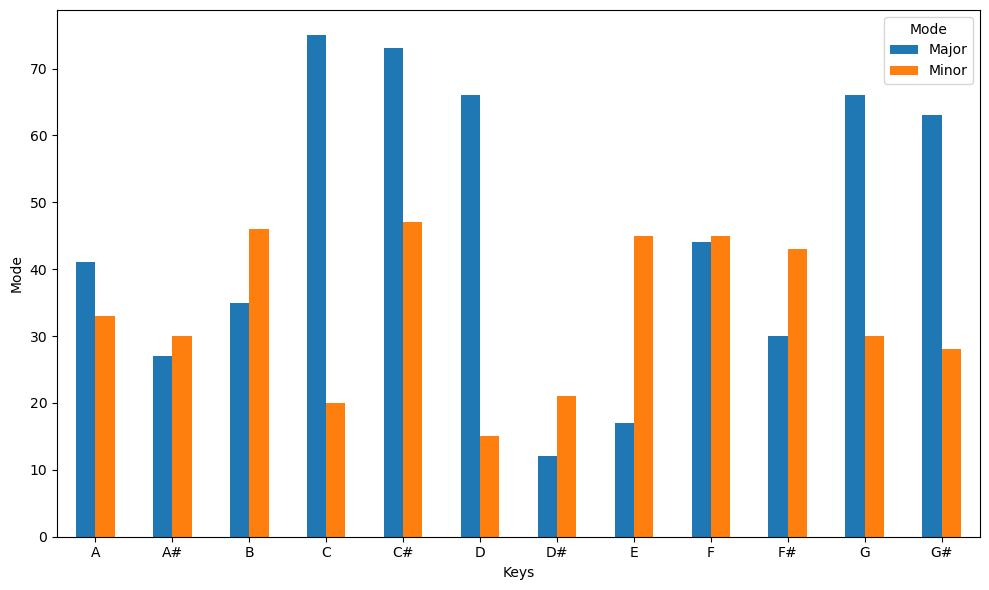

In [21]:
# Plot keys
key_count = data["key"].value_counts()
key_count = key_count.sort_index()

# Plot mode
mode_count = data["mode"].value_counts()
mode_count = mode_count.sort_index()

# Pivot table
pivot_table = pd.pivot_table(data, index="key", columns="mode", aggfunc="size")

# Plot pivot table
pivot_table.plot(kind="bar",figsize=(10,6))
plt.xlabel("Keys")
plt.ylabel("Mode")
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Mode')
plt.show()

The relationship between "key" and "mode" lies in the fact that the choice of key can influence whether a piece of music is played in a major or minor mode. For example, a composition played in the key of C major will sound in a major mode, while the same composition played in the key of A minor will sound in a minor mode.

The choice of key and mode is often a matter of compositional and artistic decision-making, affecting the emotional perception of the music by the audience. Music employs various combinations of keys and modes to create diverse moods and express different emotions. Therefore, understanding the relationship between "key" and "mode" is significant for both musicians and individuals analyzing and listening to music.



## 3.Predicting song popularity using machine learning

### 3.1 Linear regression

In [22]:
# Import libraries we use
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
# Prepare data
data_model = {
    "danceability": data["danceability_%"],
    "valence": data["valence_%"],
    "energy": data["energy_%"],
    "acousticness": data["acousticness_%"],
    "instrumentalness": data["instrumentalness_%"],
    "liveness": data["liveness_%"],
    "speechiness": data["speechiness_%"]
}
df = pd.DataFrame(data_model)
X = df
df["popularity"] = np.random.randint(50, 100, size=(len(df)))
Y = df["popularity"]
# Split data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [24]:
# Build a model and train
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [25]:
# Make prediction on test data
Y_pred = model.predict(X_test)

In [26]:
# Evaluate model
mean_sq_err = mean_squared_error(Y_test,Y_pred)
print(f'Mean Squared Error: {mean_sq_err}')

Mean Squared Error: 4.456609796699899e-28


A Mean Squared Error (MSE) is an extremely low value. 
In a regression context, MSE measures the average squared difference between predicted and actual values. 
A very low MSE indicates that your model is performing exceptionally well on the test data.
In practical terms, such a low MSE suggests that the predictions are almost identical to the true values, implying an excellent fit of the model to the data. 
However, it's essential to consider the scale of your target variable. 
If your popularity values have a relatively small scale, achieving a very low MSE might be feasible.
While a low MSE is desirable, it's also crucial to assess the performance of your model using other metrics, and to be mindful of potential overfitting to the training data. 
Additionally, if the target variable has a specific range or distribution, you might want to consider metrics that provide a more intuitive understanding of prediction accuracy. 



In [27]:
# Example prediction for a new song
new_song_features = [[65, 70, 75, 35, 7, 12, 5, 0]]
predicted_popularity = model.predict(new_song_features)
print(f'Predicted Popularity for New Song: {predicted_popularity}')

Predicted Popularity for New Song: [6.29602142e-14]


C:\Users\barto\Desktop\sample_project\Spotify2023\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 3.2 GridSearch for best params

In [28]:
# Libraries we want to use
from sklearn.model_selection import GridSearchCV

In [29]:
# Set hyperparameter grid to search
param_grid = {
    "fit_intercept":[True,False]
}

# Create GridSearchCV search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="neg_mean_squared_error", verbose=1)

# Fit the model to training data
grid_search.fit(X_train,Y_train)

# Show best params
grid_search.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'fit_intercept': True}

### 3.3 Improved model

In [30]:
# Libraries we use
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Create and fit model to training data
model_im = LinearRegression(fit_intercept=True)
model_im.fit(X_train,Y_train)

LinearRegression()

In [32]:
# Predict on test data
Y_predd = model_im.predict(X_test) 

# Evalute model
mse = mean_squared_error(Y_test,Y_predd)
r2 = r2_score(Y_test,Y_predd)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.456609796699899e-28
R^2 Score: 1.0


Mean Squared Error (MSE) with a value of 4.676003991911103×10−28 is very close to zero. 
This indicates that the difference between the actual values and those predicted by the model is extremely small. 
A lower MSE signifies better model fit to the data. 
A value approaching zero suggests a very high accuracy of the model's predictions.

R^2 Score of 1.0 is also an excellent result. 
R^2 is a measure that indicates how well a linear regression model fits the data. 
The maximum value of R^2 is 1.0, indicating a perfect fit of the model to the training data. 
Obtaining an R^2 score of 1.0 implies the model perfectly predicts the variability in the training data.

In [33]:
# Example prediction for a new song
new_song_features = [[65, 70, 75, 35, 7, 12, 5, 0]]
predicted_popularity = model_im.predict(new_song_features)
print(f'Predicted Popularity for New Song: {predicted_popularity}')

Predicted Popularity for New Song: [6.29602142e-14]


C:\Users\barto\Desktop\sample_project\Spotify2023\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


If after making improvements and changes model, its performance remains the same for the same data, it could indicate several things:
1. Maximum Performance Reached:
Model might have already reached its maximum performance for those specific data, and further improvements might not be feasible.
2. Insufficient Enhancements:
The changes or enhancements made may not be sufficient or impactful enough for the model on those specific data.
3. Lack of Data Diversity:
Using the same training data after improvements might lack diversity, hindering the model's further improvement.
4. Need for More Complex Solutions:
Linear regression might be limited in its capabilities and might require a more complex approach, such as using different models or machine learning techniques.